# Plot Setting

In [1]:
import os
import sys
from pathlib import Path

# Set root and data directories
ROOT_DIR = Path(os.getcwd()).resolve().parent.parent
sys.path.insert(0,str(ROOT_DIR))
from path import DATA_DIR
from utils import sample_based_pcc

print("ROOT_DIR:", ROOT_DIR)
print("DATA_DIR:", DATA_DIR)


ROOT_DIR: /root/project/reproducity
DATA_DIR: /data/sequential_data


In [2]:
import pickle
import numpy as np
import pandas as pd

import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Configure Matplotlib styles

mpl.rcParams.update({
    "axes.labelsize": 7,
    "xtick.labelsize": 5,
    "ytick.labelsize": 5,
    "legend.frameon": False,
    "legend.fontsize": 3,
    "axes.linewidth": 0.5,
    "pdf.fonttype": 42,
    "figure.dpi": 300,
})


In [3]:
for step in range(2,10):

    window_size = 50
    plot_data_path = ROOT_DIR.parent / f"scripts/AlphaTherapy/working_log/ENV_FDA_MCF7_STEP{step}_SEED1/plot_test_data.csv"
    data= pd.read_csv(plot_data_path)
    plot_len = data.shape[0]-window_size+1
    sequential_synergy_rewards = np.zeros([10, plot_len])
    efficacy_rewards = np.zeros([10, plot_len])
    episode_rewards = np.zeros([10, plot_len])

    for seed in range(1, 11):
        plot_data_path = ROOT_DIR.parent / f"scripts/AlphaTherapy/working_log/ENV_FDA_MCF7_STEP{step}_SEED{seed}/plot_test_data.csv"
        data= pd.read_csv(plot_data_path)

        sequential_synergy_rewards[seed-1, :] = np.convolve(data["diff"], np.ones(window_size)/window_size, mode='valid')
        efficacy_rewards[seed-1, :] = np.convolve(data["eff"], np.ones(window_size)/window_size, mode='valid')
        episode_rewards[seed-1, :] = np.convolve(data["reward"], np.ones(window_size)/window_size, mode='valid')

    sequential_synergy_rewards_mean = np.mean(sequential_synergy_rewards, axis=0)
    sequential_synergy_rewards_std = np.std(sequential_synergy_rewards, axis=0)
    efficacy_rewards_mean = np.mean(efficacy_rewards, axis=0)
    efficacy_rewards_std = np.std(efficacy_rewards, axis=0)
    episode_rewards_mean = np.mean(episode_rewards, axis=0)
    episode_rewards_std = np.std(episode_rewards, axis=0)

    # plot
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(3, 3), sharex=True)

    # figure1
    x = np.arange(0, sequential_synergy_rewards_mean.shape[0])
    ax1.plot(sequential_synergy_rewards_mean, linewidth=1.0)
    ax1.set_ylabel('Sequential synergy \n reward')
    ax1.tick_params(axis='both')
    ax1.fill_between(x, sequential_synergy_rewards_mean - sequential_synergy_rewards_std, sequential_synergy_rewards_mean + sequential_synergy_rewards_std, color='gray', alpha=0.3, label='Standard Deviation')

    # figure2
    ax2.plot(efficacy_rewards_mean, linewidth=1.0)
    ax2.set_ylabel('Efficacy reward \n')
    ax2.legend(frameon=False)
    ax2.tick_params(axis='both')
    ax2.fill_between(x, efficacy_rewards_mean - efficacy_rewards_std, efficacy_rewards_mean + efficacy_rewards_std, color='gray', alpha=0.3, label='Standard Deviation')

    # figure3
    ax3.plot(episode_rewards_mean, linewidth=1.0)
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Episode reward \n')
    ax3.tick_params(axis='both')
    ax3.fill_between(x, episode_rewards_mean - episode_rewards_std, episode_rewards_mean + episode_rewards_std, color='gray', alpha=0.3, label='Standard Deviation')

    fig.tight_layout()
    fig.savefig(DATA_DIR / f'result_2025/AlphaTherapy/Supplymentary_fig4_step{step}.png', dpi=300, bbox_inches='tight')

/tmp/ipykernel_636579/2630592941.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(frameon=False)
/tmp/ipykernel_636579/2630592941.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(frameon=False)
/tmp/ipykernel_636579/2630592941.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(frameon=False)
/tmp/ipykernel_636579/2630592941.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(frameon=False)
/tmp/ipykernel_636579/2630592941.py:39: UserWarn

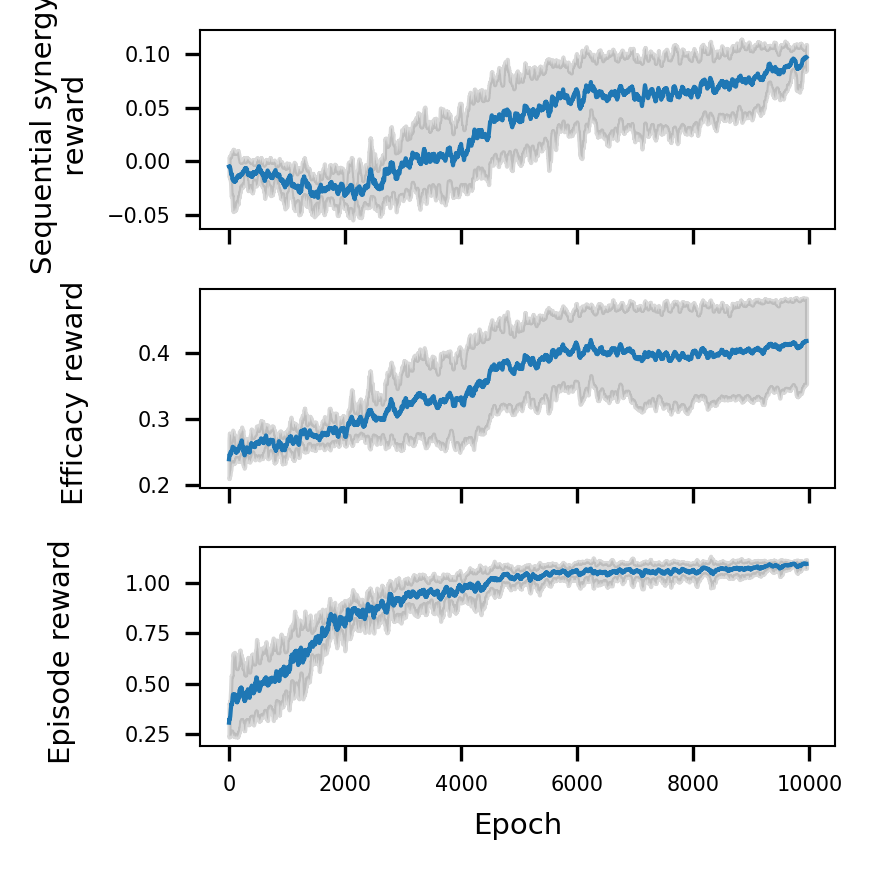

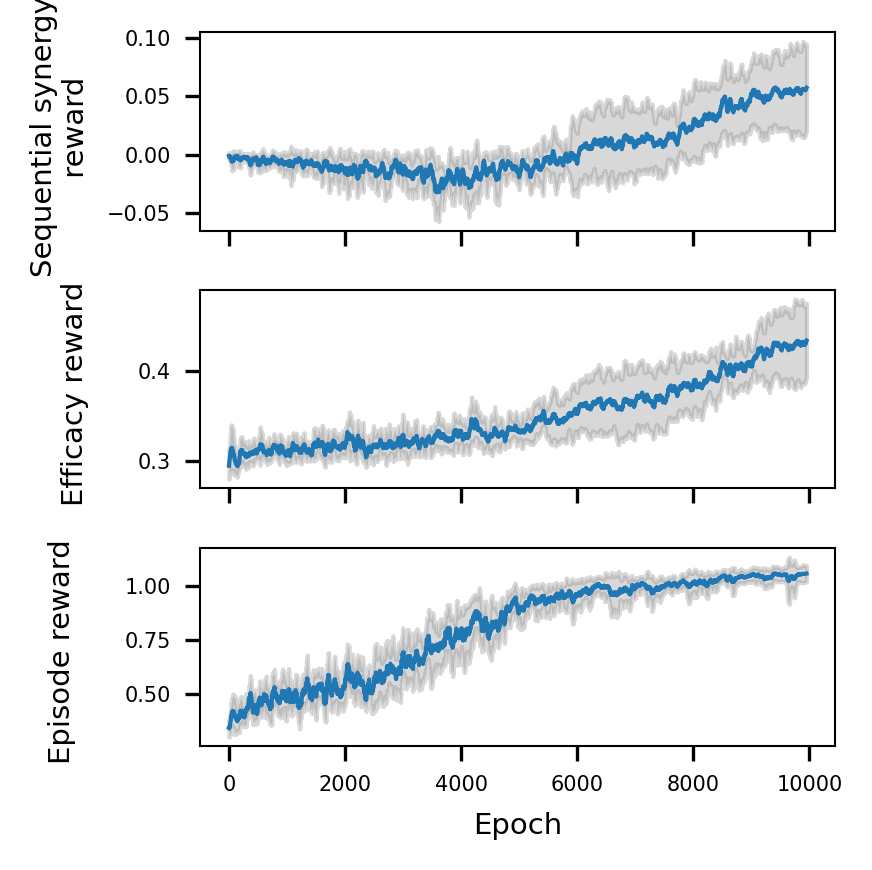

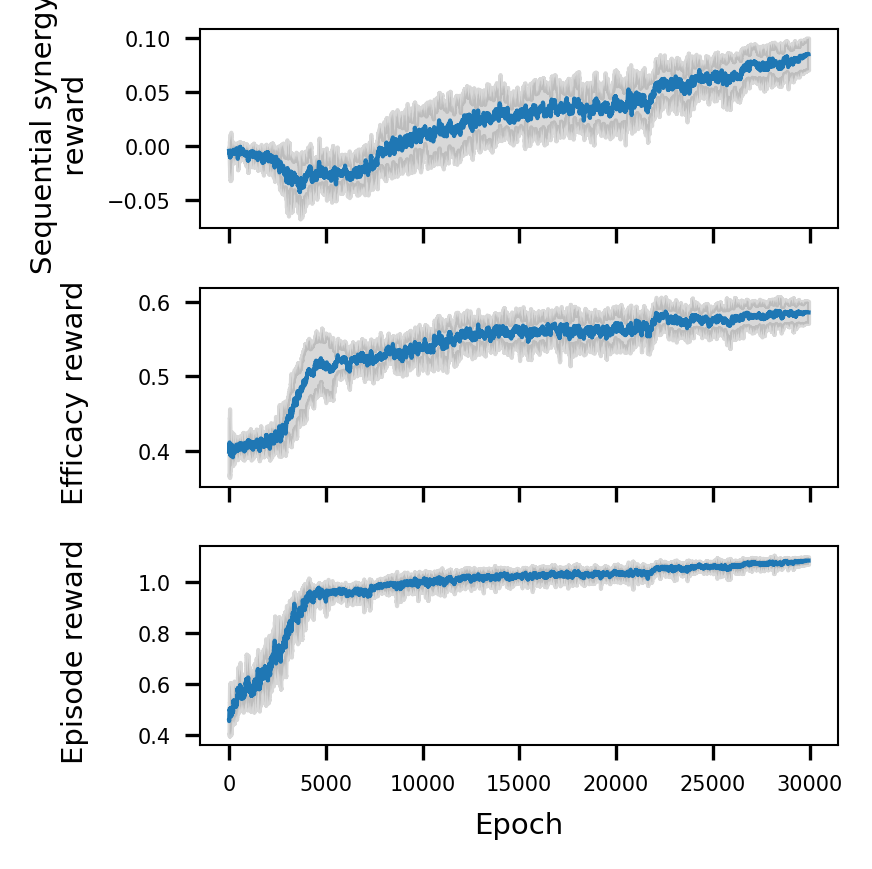

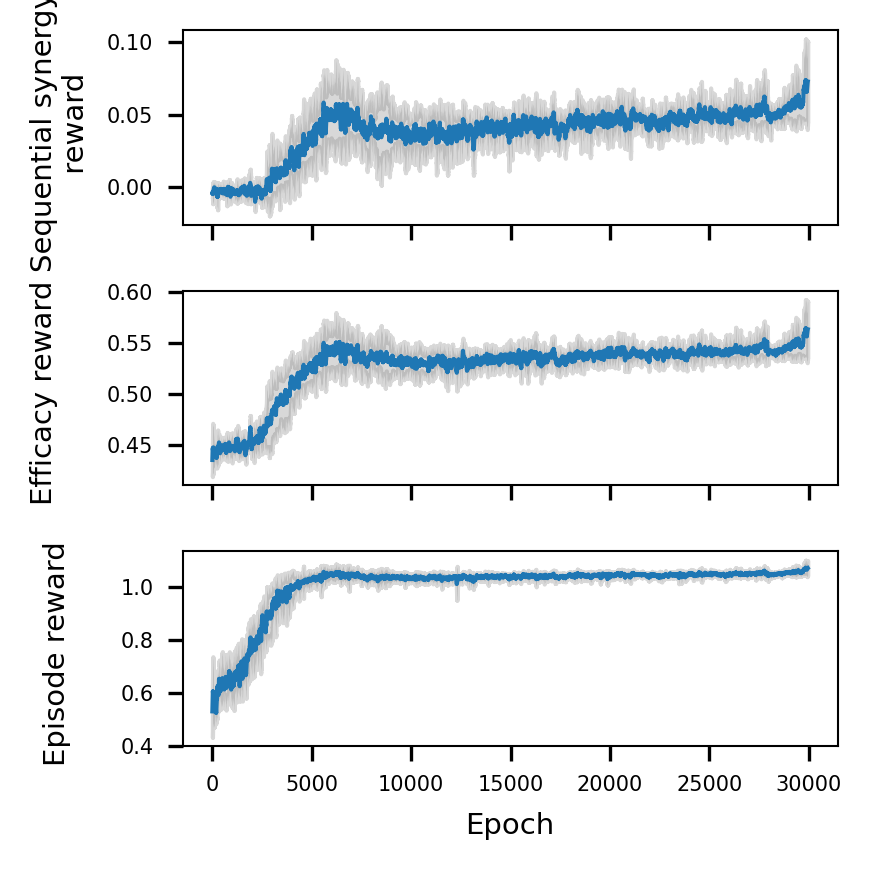

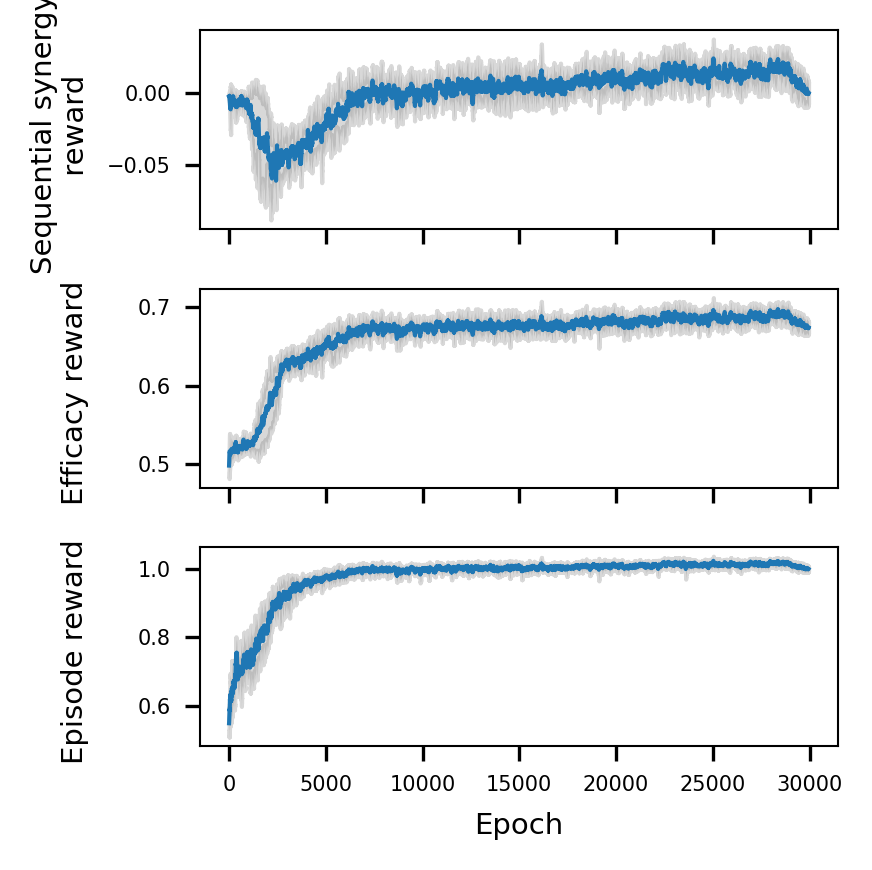

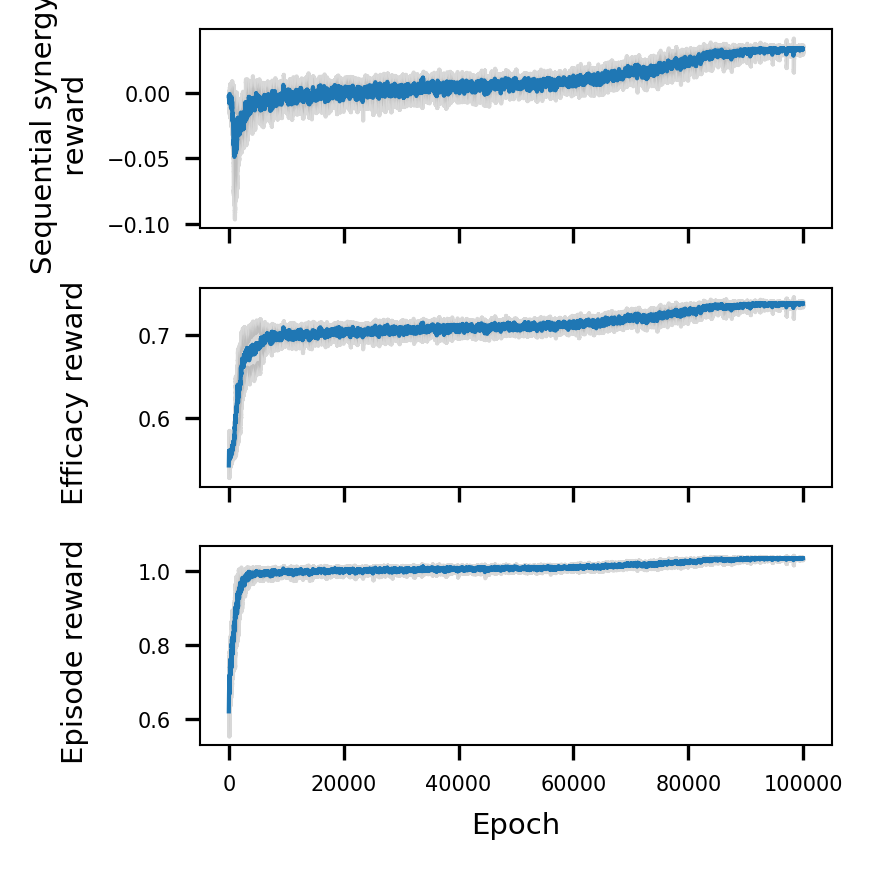

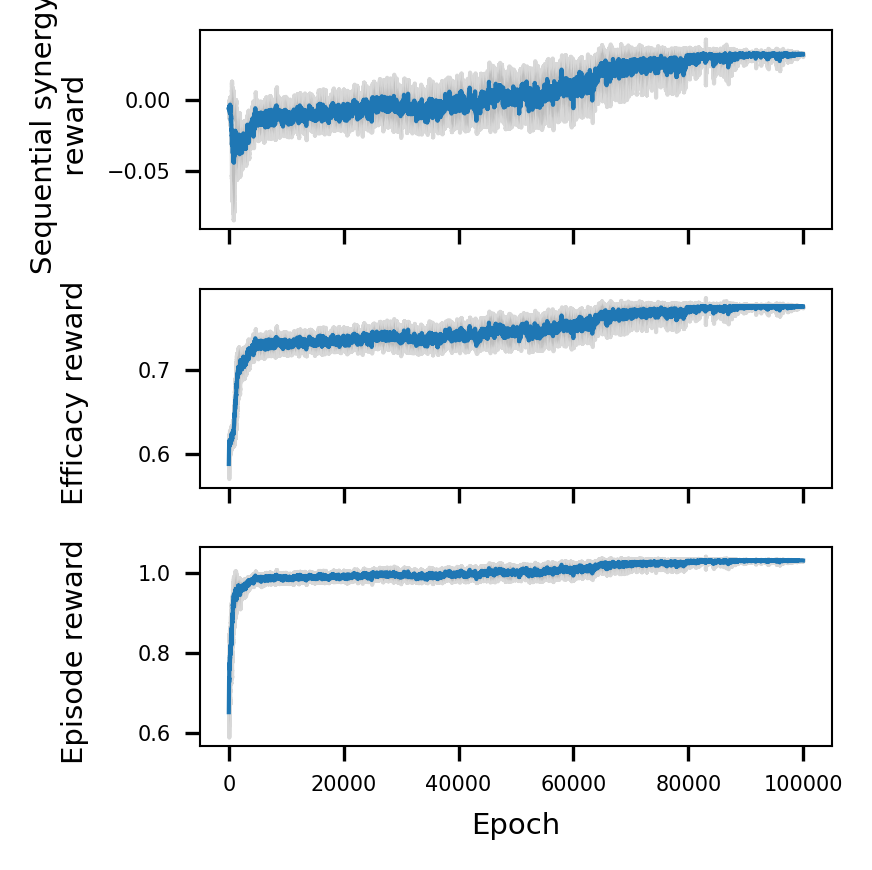

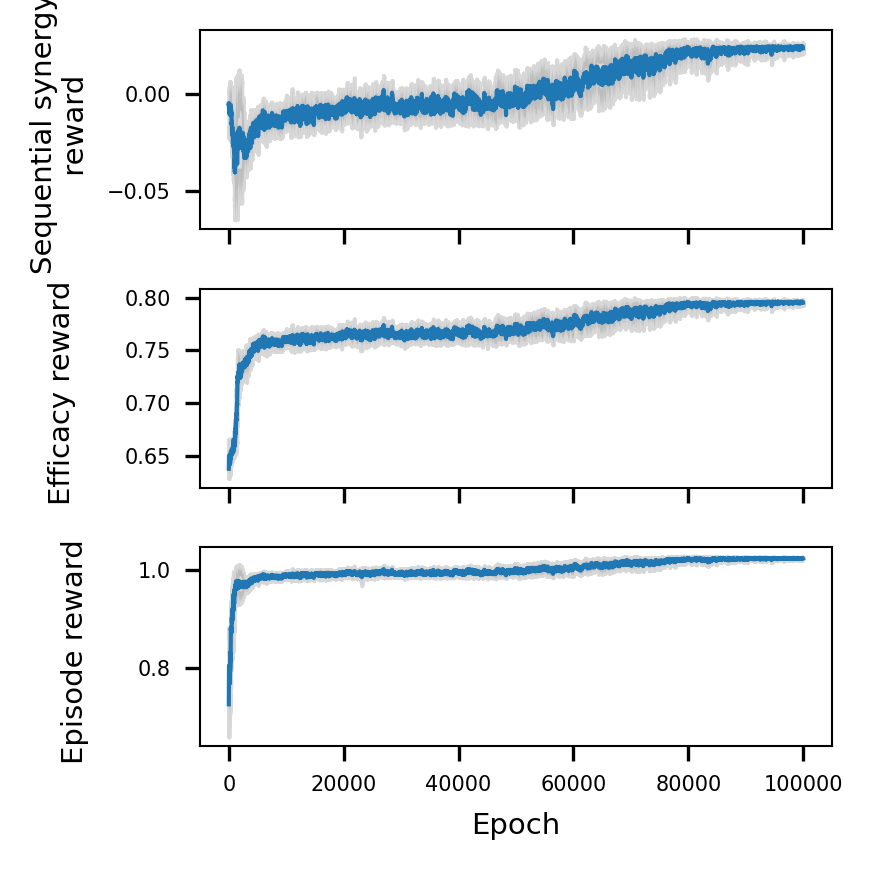

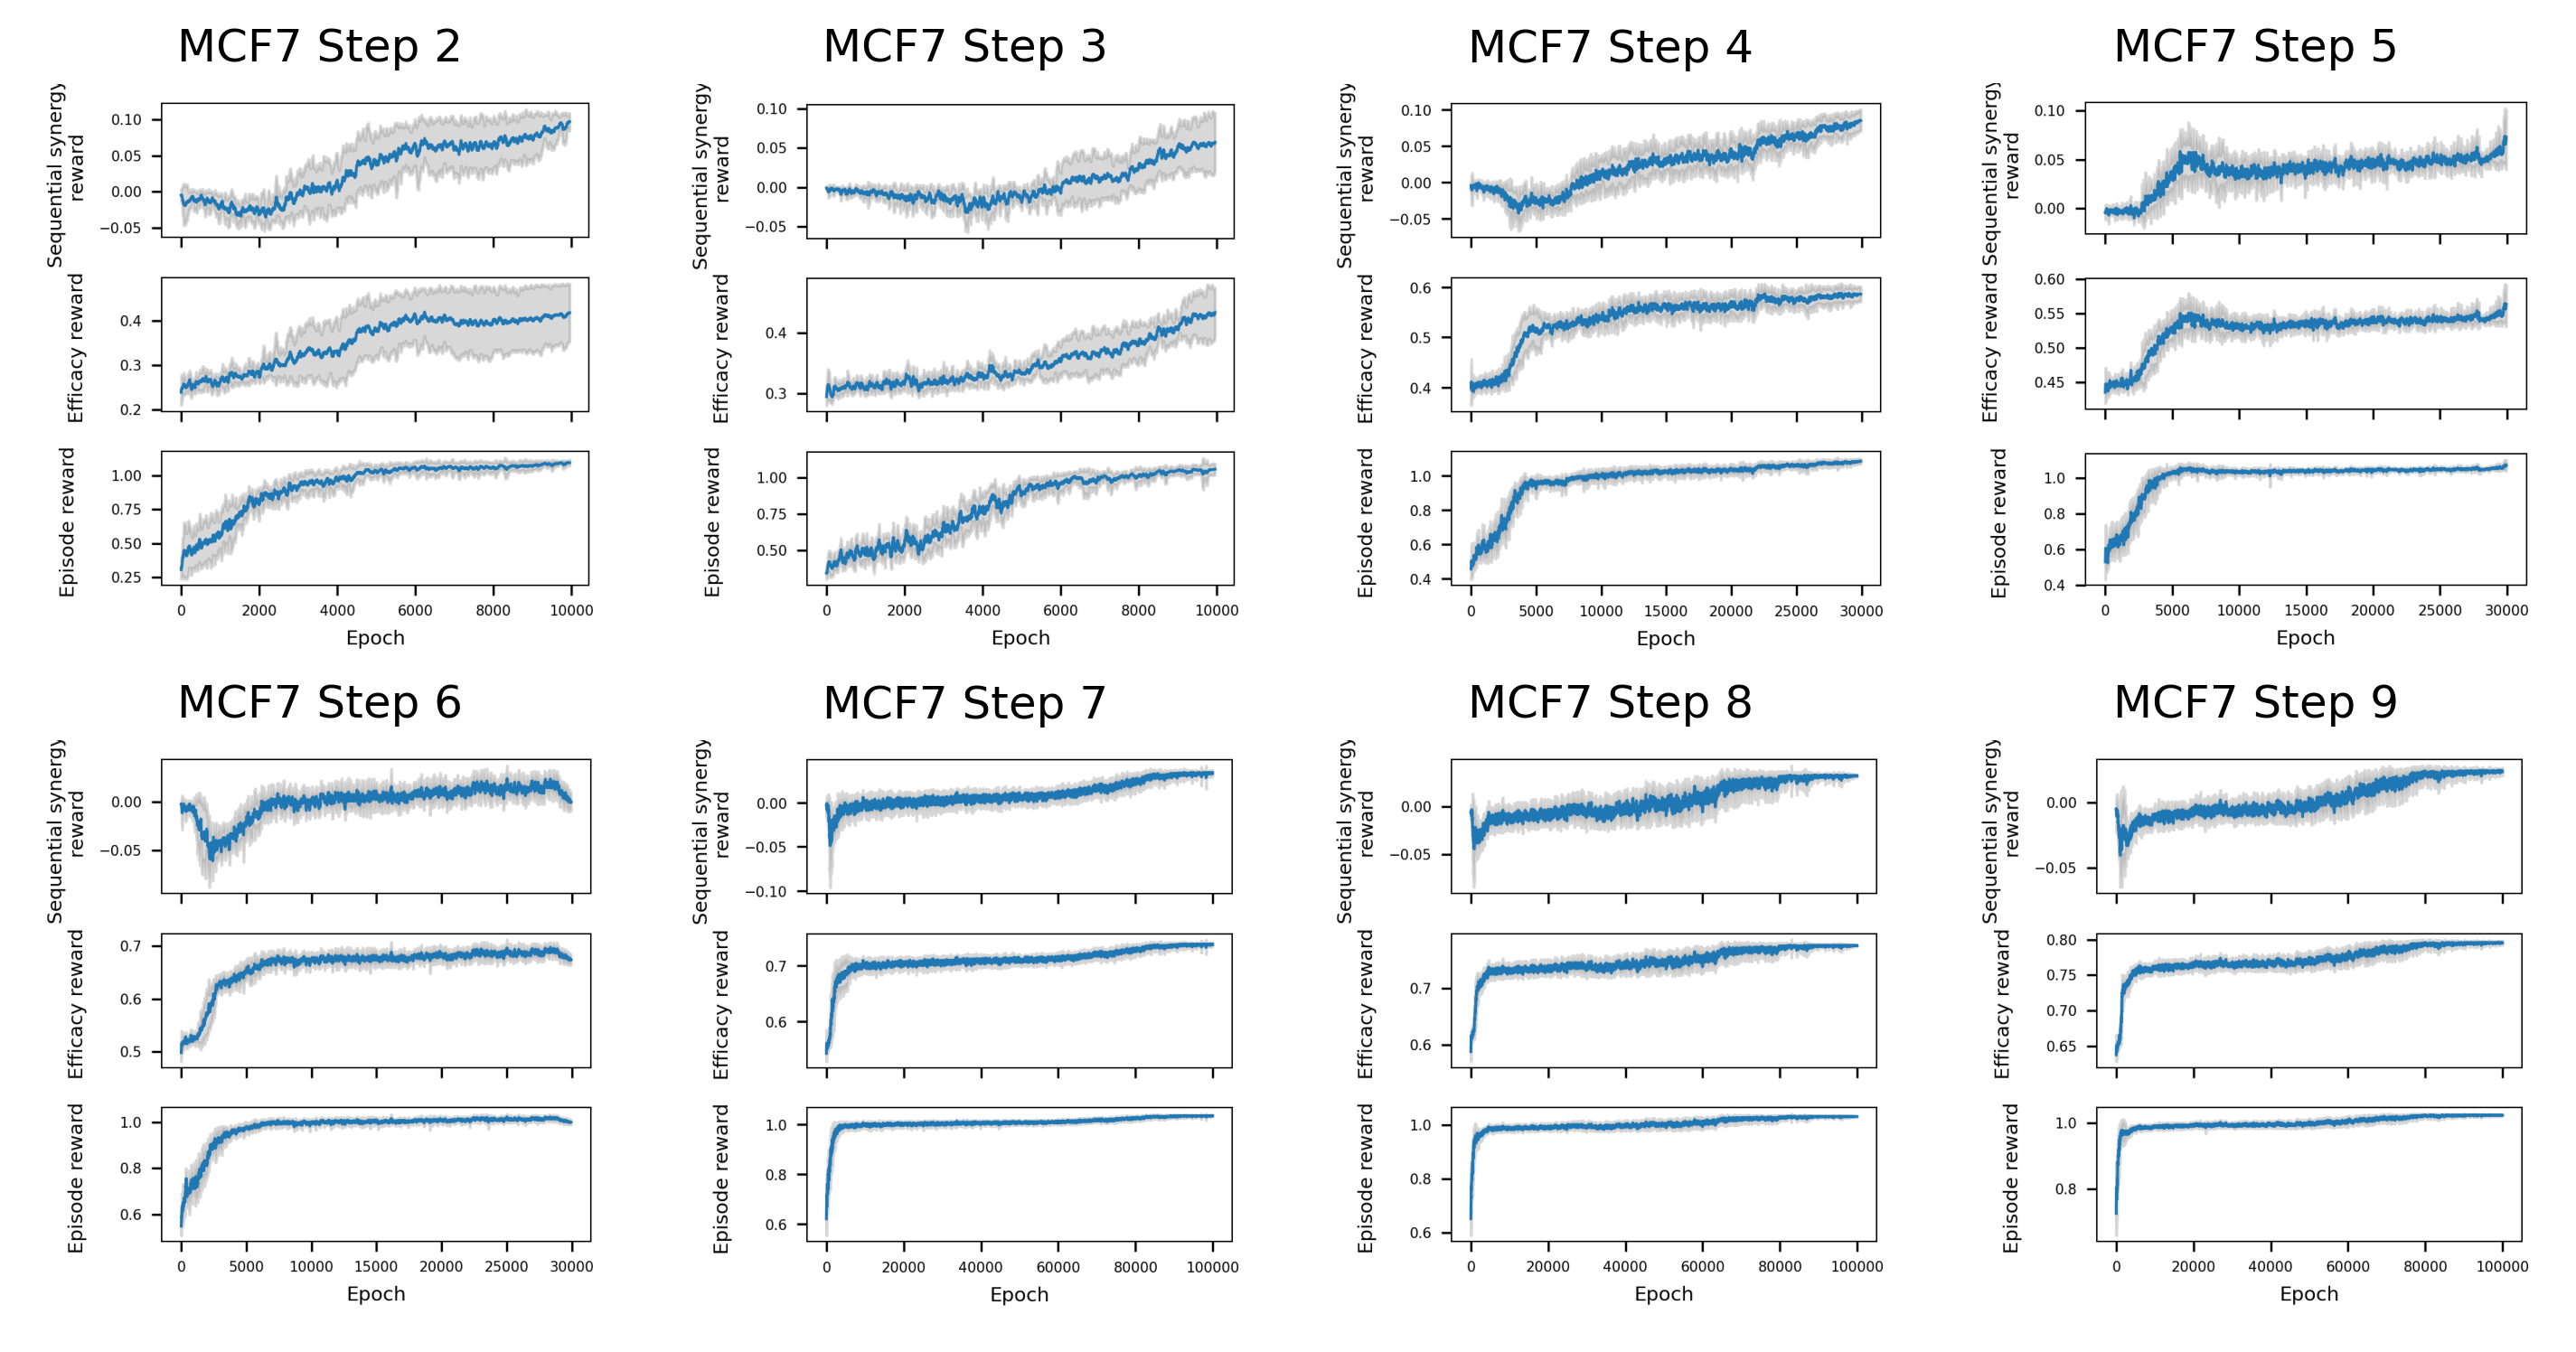

In [4]:
# Create a 2-row by 4-column subplot layout
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# Loop through and import images for display
count = 2  # Starting step count
for i in range(2):
    for j in range(4):
        # Load the image for the current step
        img = plt.imread(DATA_DIR / f'result_2025/AlphaTherapy/Supplymentary_fig4_step{count}.png')
        count += 1
        # Display the image in the current subplot
        axs[i, j].imshow(img)
        axs[i, j].axis('off')  # Hide axes for a cleaner look

        # Set subplot title
        axs[i, j].set_title(f'MCF7 Step {count - 1}')  # Display step count in the title

# Adjust subplot spacing to prevent overlap
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show the final figure
plt.show()
